# 요인 분석 진행

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법이다.

다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법이다. 

또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있다.

<요인분석방법>

요인분석방법은 자료의 총분산을 구성하는 요소 중 어느 부분을 사용하느냐에 따라 다음과 같은 두 가지로 구성됩니다.

① 주성분분석(principle component analysis) : 원래의 변수들의 분산 중 가급적 많은 부분을 설명하는 소수의 요인을 추출하는데 목적이 있고, 공통분산이 크다는 사실을 아는 경우에 적절합니다. 주성분분석의 경우 상관행렬의 대각선에 1이 사용되는데 이는 모든 분산이 공유된다는 것을 의미합니다.

② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/Paris/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        30990 non-null  int64  
 1   호스트_id       30990 non-null  int64  
 2   슈퍼호스트        30990 non-null  object 
 3   숙소_수         30990 non-null  float64
 4   숙소_지역        30990 non-null  object 
 5   숙소_유형        30990 non-null  object 
 6   수용_인원수       30990 non-null  int64  
 7   욕실수          30990 non-null  float64
 8   침실수          30990 non-null  float64
 9   침대수          30990 non-null  float64
 10  편의시설         30990 non-null  object 
 11  숙소_가격        30990 non-null  float64
 12  최소_숙박일       30990 non-null  int64  
 13  최대_숙박일       30990 non-null  int64  
 14  리뷰수          30990 non-null  int64  
 15  30일_리뷰수      30990 non-null  int64  
 16  리뷰점수         30990 non-null  float64
 17  숙소_정확성_리뷰점수  30990 non-null  float64
 18  숙소_청결도_리뷰점수  30990 non-null  float64
 19  숙소_체크인_리뷰

In [4]:
df.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', 'url', '숙소_특징', '12개월_리뷰수',
       '예약가능여부', '마지막_리뷰'],
      dtype='object')

PCA 전 상관계수 확인

In [5]:
# 상관계수에 불필요한 컬럼들 제거
df_clean = df.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])


In [6]:
df_clean.head(3)

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
1,1.0,2,1.0,0.0,1.0,140.0,3,365,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69,14
2,3.0,2,1.0,0.0,1.0,107.0,1,1125,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19,61
3,3.0,4,1.0,1.0,1.0,200.0,2,120,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51,1


In [7]:
df_clean.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
숙소_수,1.000000,0.072397,0.050807,0.021303,0.049705,0.011811,0.045499,0.160765,-0.034157,0.004186,-0.173307,-0.156177,-0.112109,-0.178036,-0.205230,-0.047641,-0.180827,-0.013471,-0.027291
수용_인원수,0.072397,1.000000,0.513838,0.672141,0.785599,0.199352,-0.062471,0.092453,0.027002,0.027205,-0.034344,-0.052515,-0.012051,-0.054547,-0.065996,-0.002695,-0.029298,0.042294,0.043512
욕실수,0.050807,0.513838,1.000000,0.606889,0.591580,0.173193,-0.028125,0.046594,0.007708,0.001909,0.043394,0.017499,0.061316,0.005065,0.000568,0.047160,0.042952,0.000156,0.004324
침실수,0.021303,0.672141,0.606889,1.000000,0.684795,0.174294,-0.057804,0.017404,-0.013044,-0.046988,0.068411,0.040126,0.056208,0.022338,0.021765,0.036801,0.071324,-0.048063,-0.027215
침대수,0.049705,0.785599,0.591580,0.684795,1.000000,0.167432,-0.033170,0.075789,0.047605,-0.002578,-0.016561,-0.035059,0.000239,-0.028985,-0.044119,0.012420,-0.007547,-0.001328,0.030924
숙소_가격,0.011811,0.199352,0.173193,0.174294,0.167432,1.000000,-0.007831,0.021544,-0.017450,-0.041527,0.026149,0.015281,0.040438,-0.004023,-0.014240,0.050457,0.023783,-0.038569,-0.027269
최소_숙박일,0.045499,-0.062471,-0.028125,-0.057804,-0.033170,-0.007831,1.000000,0.040583,-0.038752,-0.080922,-0.020439,-0.014411,-0.032201,-0.011889,-0.038871,0.015540,-0.036298,-0.128229,-0.106775
최대_숙박일,0.160765,0.092453,0.046594,0.017404,0.075789,0.021544,0.040583,1.000000,0.111279,0.026920,-0.106666,-0.087671,-0.069213,-0.096181,-0.114485,-0.025553,-0.102741,0.018674,0.056114
리뷰수,-0.034157,0.027002,0.007708,-0.013044,0.047605,-0.017450,-0.038752,0.111279,1.000000,0.343425,-0.012064,0.028203,0.044912,0.045389,0.026239,0.036649,0.038100,0.455391,0.674146
30일_리뷰수,0.004186,0.027205,0.001909,-0.046988,-0.002578,-0.041527,-0.080922,0.026920,0.343425,1.000000,-0.000268,-0.004559,0.054415,0.019218,0.017492,0.016562,0.019042,0.707330,0.586650


In [8]:
df_clean_corr = df_clean.corr()

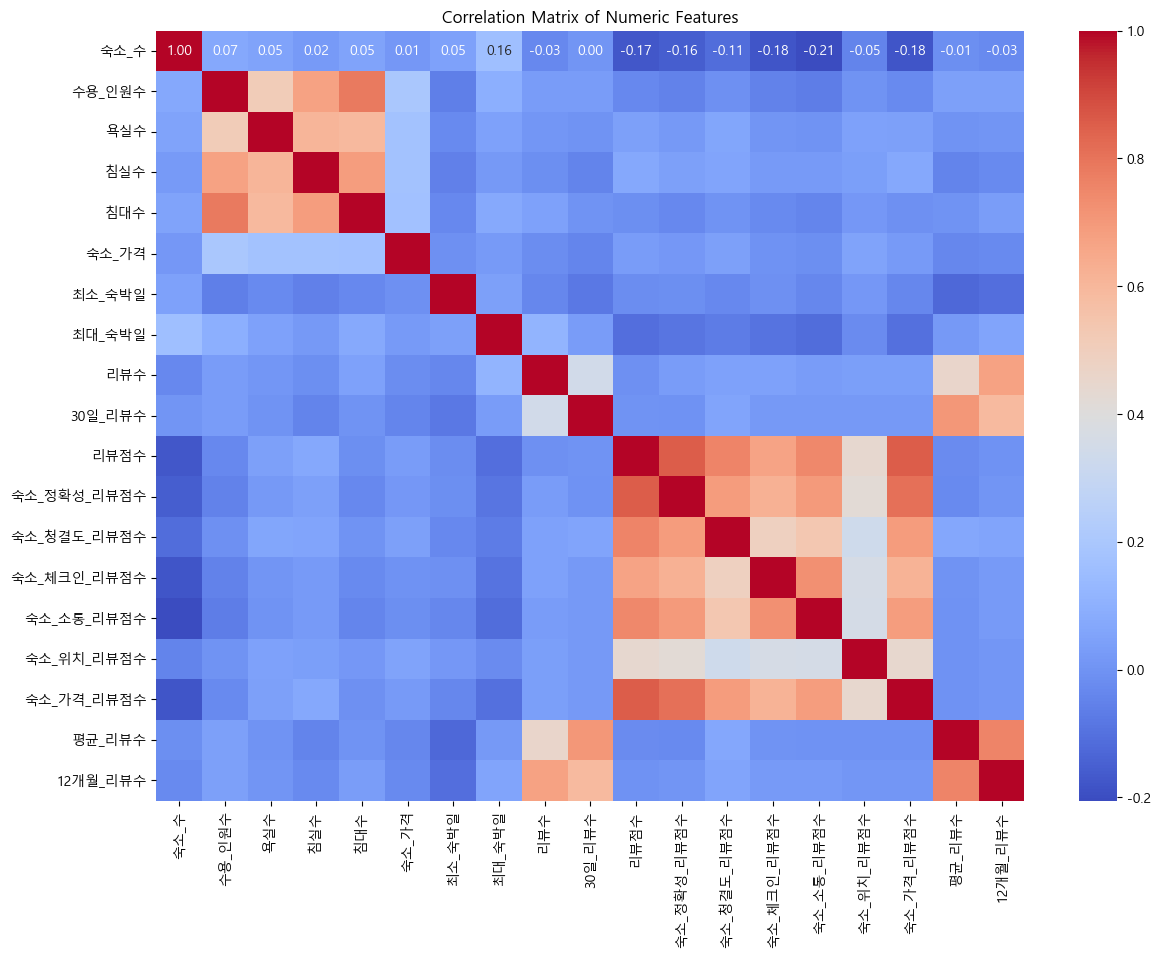

In [9]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

# PCA 분석

In [10]:
df_clean.columns

Index(['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '12개월_리뷰수'],
      dtype='object')

In [11]:
df_reviews = df_clean[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

x = df_reviews.values
y = df_clean['리뷰점수'].values

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=4)  # 주성분의 수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca.head()

,pc1,pc2,pc3,pc4
0,-0.302680,-0.511385,-0.378817,-0.108668
1,0.289025,-0.698839,-0.367042,0.139553
2,0.965861,0.549973,-0.599016,-0.319134
3,-0.280085,-0.446706,-0.666077,-0.402867
4,-0.286900,-0.563163,0.084253,-0.450034


In [13]:
pca.explained_variance_ratio_

array([0.64872037, 0.12489846, 0.10042543, 0.05315938])

In [14]:
sum(pca.explained_variance_ratio_)

0.9272036381646428

리뷰 점수
- '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수' , '숙소_소통_리뷰점수'
- [0.64872037, 0.12489846, 0.10042543, 0.05315938]
- 0.9272036381646421

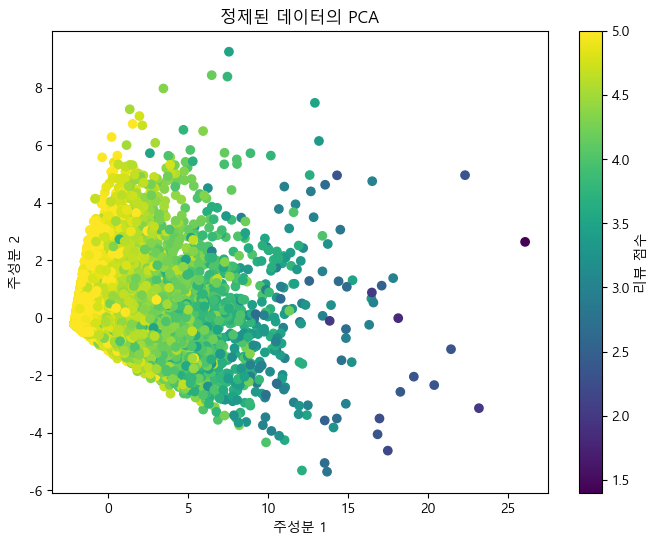

In [15]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

추출한 주성분으로 회귀분석

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4']]
y = df_regression['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# 모델 평가
y_pred = lr.predict(X_test)

In [18]:
y_pred

array([4.69161371, 4.82911565, 4.86024444, ..., 4.90109673, 4.90767702,
       4.84961856])

In [19]:
y_test

24810    4.90
4246     4.87
21997    4.87
27157    5.00
3265     4.75
         ... 
13899    4.84
14808    4.43
26830    4.89
6157     4.89
2030     4.90
Name: 리뷰점수, Length: 6198, dtype: float64

In [20]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.11
MAE: 0.07


In [21]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.85


In [22]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.74


In [23]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 4.543e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:00:11   Log-Likelihood:                 24913.
No. Observations:               30990   AIC:                        -4.982e+04
Df Residuals:                   30985   BIC:                        -4.978e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7384      0.001   7701.669      0.0

PCA 모델에서 누적된 분산 비율이 70~90% 범위인 경우 충분히 설명력이 있다고 판단할 수 있음
 - 이 경우 두 가지 선택권이 있음
 - - 데이터 특징의 90%를 살려 차원을 조금 늘릴지(여기서는 주성분 개수)
 - - 데이터 특징의 70%를 살려 차원을 최대한 축소할 지
 - 선택은 현재 시스템의 리소스 상황을 고려함

그래서 pc1과 pc2만으로 70% 가 넘어가므로 이 둘만 넣어서 회귀 분석 진행해봄

In [24]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 7.880e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:00:11   Log-Likelihood:                 23049.
No. Observations:               30990   AIC:                        -4.609e+04
Df Residuals:                   30987   BIC:                        -4.607e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7384      0.001   7252.226      0.0

전체 컬럼 중 범주형 제외 pca 분석

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         30990 non-null  float64
 1   수용_인원수       30990 non-null  int64  
 2   욕실수          30990 non-null  float64
 3   침실수          30990 non-null  float64
 4   침대수          30990 non-null  float64
 5   숙소_가격        30990 non-null  float64
 6   최소_숙박일       30990 non-null  int64  
 7   최대_숙박일       30990 non-null  int64  
 8   리뷰수          30990 non-null  int64  
 9   30일_리뷰수      30990 non-null  int64  
 10  리뷰점수         30990 non-null  float64
 11  숙소_정확성_리뷰점수  30990 non-null  float64
 12  숙소_청결도_리뷰점수  30990 non-null  float64
 13  숙소_체크인_리뷰점수  30990 non-null  float64
 14  숙소_소통_리뷰점수   30990 non-null  float64
 15  숙소_위치_리뷰점수   30990 non-null  float64
 16  숙소_가격_리뷰점수   30990 non-null  float64
 17  평균_리뷰수       30990 non-null  float64
 18  12개월_리뷰수     30990 non-null  int64  
dtypes: float6

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 독립변인과 종속변인 설정
x = df_clean.drop(columns=['리뷰점수']).values  # 독립변인들의 값만 추출
y = df_clean['리뷰점수'].values  # 종속변인 추출

# 결측값 처리
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=12)  # 주성분 개수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8',
                                                          'pc9','pc10','pc11','pc12'])
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,-0.338878,-1.532839,-0.038173,0.077398,0.048251,0.232634,-0.512039,-0.858111,-0.858167,0.109181,0.279073,-0.337500
1,-0.060359,-0.724991,5.336187,1.445992,0.314383,0.303909,-1.921268,-1.238277,-1.647147,0.082746,0.538622,0.453023
2,0.924441,-0.594528,-0.789960,-0.810098,0.150487,0.071484,-0.278102,0.125363,-0.913520,0.508613,-0.182642,0.277058
3,-0.580559,0.772017,2.316013,0.029238,1.250879,0.006792,-0.642619,-1.204538,-2.488996,0.395211,-0.323319,1.268997
4,-0.240573,0.064356,-0.220912,0.594950,0.025754,0.199804,-0.992948,-0.735618,-0.601633,-0.173380,-0.505803,0.115828
...,...,...,...,...,...,...,...,...,...,...,...,...
30985,-1.904065,-0.783122,2.565332,-0.625721,-0.372729,-0.242910,1.235325,1.790999,2.424820,0.051464,0.131118,0.543466
30986,-2.122384,-1.196884,1.287811,0.961792,-0.805731,-0.178959,-0.072803,0.402191,2.408045,-0.127382,0.376218,0.587520
30987,-2.177061,0.517778,0.287309,-0.275151,-0.309990,-0.390010,0.690218,0.090861,1.394585,-0.025717,-0.638204,0.534469
30988,1.891135,1.521391,0.464844,-0.639816,-0.099214,-0.177470,0.711630,-1.059428,1.605729,0.594249,-1.157483,0.490673


In [27]:
pca.explained_variance_ratio_

array([0.22076125, 0.16796894, 0.15590424, 0.06378205, 0.05295055,
       0.05225754, 0.04827873, 0.04056497, 0.03816209, 0.03280494,
       0.02871818, 0.01855913])

In [28]:
sum(pca.explained_variance_ratio_)
# 전체 컬럼 19개 중에 12개가 92%

0.9207125999636492

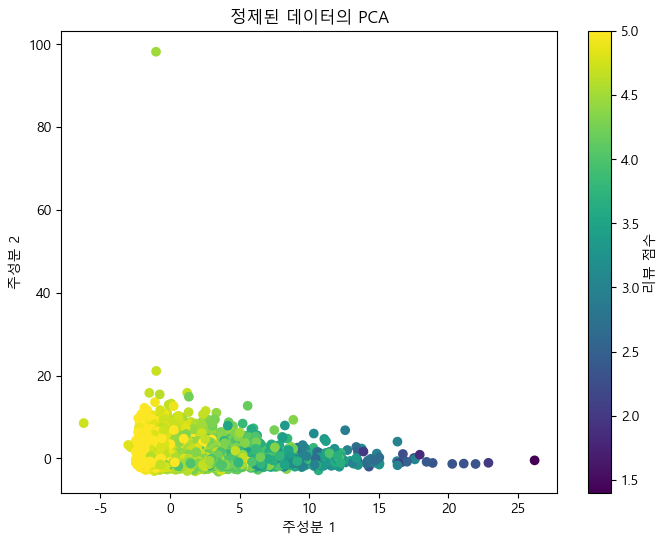

In [29]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

추출한 주성분으로 회귀분석

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_pca.values  # 주성분들의 값만 추출
y = df_regression['리뷰점수'].values  # 종속변인 추출

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [31]:
# 모델 평가
y_pred = lr.predict(X_test)

In [32]:
y_pred

array([4.70460183, 4.83563548, 4.86056837, ..., 4.91115095, 4.89332156,
       4.84793945])

In [33]:
y_test

array([4.9 , 4.87, 4.87, ..., 4.89, 4.89, 4.9 ])

In [34]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.11
MAE: 0.07


In [35]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.85


In [36]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.74


In [37]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택

X = df_pca[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.512e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:00:12   Log-Likelihood:                 24896.
No. Observations:               30990   AIC:                        -4.977e+04
Df Residuals:                   30977   BIC:                        -4.966e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7384      0.001   7696.325      0.0

리뷰 점수와 상관계수가 있는 6개의 컬럼으로 pca분석을 돌린 주성분 4개의 회귀모델 R-squared = 0.854
 - 주성분 4개 이유 : 4개 넣어야. 90%를 넘겼음.
 - [0.64872037, 0.12489846, 0.10042543, 0.05315938]
<br>

전체 데이터(범주형 데이터 제외한 df) 19개 중 pca분석을 통해 나온 주성분 12개의 회귀모델 R-squared = 0.854
 - 주성분 12개 이유 : 12개 넣어야. 90%를 넘겼음.
 - [0.22076125, 0.16796894, 0.15590424, 0.06378205, 0.05295055, 0.05225754, 0.04827873, 0.04056497, 0.03816209, 0.03280494, 0.02871818, 0.01855913]

결과 : 
- 두 경우의 R-squared 가 똑같음.
- 다만 둘 다 90을 넘지 못하였음.

# 공통 요인 분석 진행

In [38]:
!pip install factor-analyzer

Defaulting to user installation because normal site-packages is not writeable


In [39]:
# 필요한 라이브러리 불러오기
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [40]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df_clean) 

# 결과 출력
print(fa.loadings_)


[[-0.20482319  0.04362272]
 [-0.13838085  0.83320206]
 [-0.0349018   0.67717657]
 [-0.02777767  0.80859062]
 [-0.11871024  0.87546972]
 [-0.0025356   0.22143881]
 [-0.02566211 -0.05978086]
 [-0.12497894  0.06714137]
 [ 0.0351822   0.04193865]
 [ 0.02539906  0.01414047]
 [ 0.94777339  0.11405048]
 [ 0.88789682  0.08099455]
 [ 0.73365967  0.11134056]
 [ 0.72949378  0.05114521]
 [ 0.8024104   0.04737542]
 [ 0.46390572  0.07938715]
 [ 0.88569059  0.11415283]
 [ 0.00765146  0.01943013]
 [ 0.02643249  0.03851251]]


In [41]:
import pandas as pd

# 결과를 df로 변환 
loadings_df = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2'])
loadings_df

,Factor1,Factor2
0,-0.204823,0.043623
1,-0.138381,0.833202
2,-0.034902,0.677177
3,-0.027778,0.808591
4,-0.118710,0.875470
5,-0.002536,0.221439
6,-0.025662,-0.059781
7,-0.124979,0.067141
8,0.035182,0.041939
9,0.025399,0.014140


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         30990 non-null  float64
 1   수용_인원수       30990 non-null  int64  
 2   욕실수          30990 non-null  float64
 3   침실수          30990 non-null  float64
 4   침대수          30990 non-null  float64
 5   숙소_가격        30990 non-null  float64
 6   최소_숙박일       30990 non-null  int64  
 7   최대_숙박일       30990 non-null  int64  
 8   리뷰수          30990 non-null  int64  
 9   30일_리뷰수      30990 non-null  int64  
 10  리뷰점수         30990 non-null  float64
 11  숙소_정확성_리뷰점수  30990 non-null  float64
 12  숙소_청결도_리뷰점수  30990 non-null  float64
 13  숙소_체크인_리뷰점수  30990 non-null  float64
 14  숙소_소통_리뷰점수   30990 non-null  float64
 15  숙소_위치_리뷰점수   30990 non-null  float64
 16  숙소_가격_리뷰점수   30990 non-null  float64
 17  평균_리뷰수       30990 non-null  float64
 18  12개월_리뷰수     30990 non-null  int64  
dtypes: float6

In [43]:
loadings_df[loadings_df['Factor1'] >= 0.6]

,Factor1,Factor2
10,0.947773,0.114050
11,0.887897,0.080995
12,0.733660,0.111341
13,0.729494,0.051145
14,0.802410,0.047375
16,0.885691,0.114153


Factor1에서 높은 유사성을 나타낸 값들<br>
10  리뷰점수<br>
11  숙소_정확성_리뷰점수<br>
12  숙소_청결도_리뷰점수<br>
13  숙소_체크인_리뷰점수<br>
14  숙소_소통_리뷰점수<br>
16  숙소_가격_리뷰점수<br>
리뷰점수 + 리뷰 상세 항목들(위치항목 제외)

해당 결과는 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성한 것임.

In [44]:
loadings_df[loadings_df['Factor2'] >= 0.6]

,Factor1,Factor2
1,-0.138381,0.833202
2,-0.034902,0.677177
3,-0.027778,0.808591
4,-0.118710,0.875470


Factor2에서 높은 유사성을 나타낸 값들<br>
1   수용_인원수<br>
2   욕실수<br>
3   침실수<br>
4   침대수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

확인 결과 : 
 - 상관관계에서 나타났던 값들끼리 나왔음.
 - 결과를 보니 요인 분석 중 공통요인분석을 진행한 것 같음.
 - - ② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.

잘못된 부분이 있을 것 같아 새로 시작(회귀분석 과정에서 실패 이후)

먼저 모든 가능한 요인 수(n_factors=df_clean.shape[1])로 초기 공통요인 분석을 실행하여 각 요인의 고유값을 계산
 - 유값은 요인이 데이터 집합의 변동성을 얼마나 잘 설명하는지를 나타냄

In [45]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# FactorAnalyzer 초기화
fa = FactorAnalyzer(rotation=None, n_factors=df_clean.shape[1], method='principal')
fa.fit(df_clean)

# 고유값(Eigenvalues) 확인
ev, v = fa.get_eigenvalues()
print(ev)

[4.82708015 3.02351035 2.81156163 1.15014222 0.95414498 0.94088336
 0.86980626 0.74033758 0.68698733 0.60004538 0.51765891 0.33583561
 0.3168622  0.30227381 0.24623445 0.20246913 0.18997193 0.17414822
 0.1100465 ]


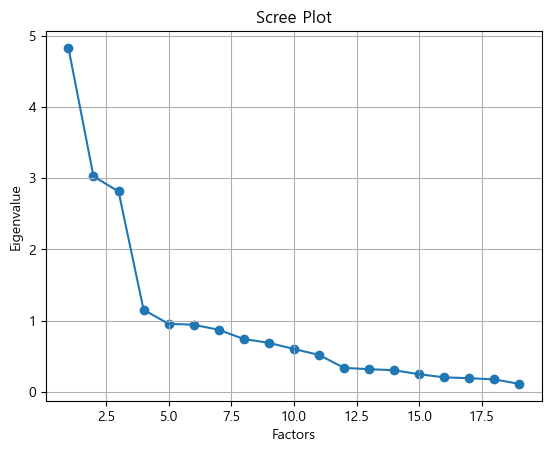

In [46]:
# 스크리 플롯으로 요인 수 결정
plt.scatter(range(1, df_clean.shape[1]+1), ev)
plt.plot(range(1, df_clean.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

고유값이 1 이상인 요인들은 데이터 집합의 중요한 변동성을 설명한다고 할 수 있으므로, 이를 기준으로 요인 수를 결정
 - 일반적으로 고유값이 1 이상인 요인을 선택
 - 마지막으로, 결정된 요인 수로 요인 분석을 재실행하고, 요인 회전(rotation="varimax")을 적용하여 요인의 해석을 용이하게 함

In [47]:
# 요인 수 결정 (예: 고유값이 1 이상인 요인 수)
n_factors = sum(ev > 1)

# 요인 분석 재실행, 이번에는 요인 수 지정
fa = FactorAnalyzer(rotation="varimax", n_factors=n_factors)
fa.fit(df_clean)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

요인 부하량 확인하기<br>
요인 부하량은 각 변수가 요인에 어떻게 연관되어 있는지를 보여줍니다. 높은 절대값을 가진 부하량은 해당 변수가 요인과 강하게 연관되어 있음을 의미합니다.

In [48]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df_clean.columns))

                    0         1         2         3
숙소_수        -0.200488  0.060469 -0.015347 -0.000194
수용_인원수      -0.076192  0.835975  0.089777  0.026804
욕실수          0.016404  0.677324  0.037856  0.009494
침실수          0.034750  0.814914  0.000990 -0.000641
침대수         -0.050753  0.877861  0.047569  0.063324
숙소_가격        0.015607  0.224529 -0.029262 -0.000854
최소_숙박일      -0.024971 -0.047898 -0.138342  0.014975
최대_숙박일      -0.116720  0.069492  0.009397  0.126651
리뷰수          0.059197 -0.025911  0.361309  0.924474
30일_리뷰수      0.005887 -0.049599  0.729476  0.089077
리뷰점수         0.953142  0.045199  0.008596 -0.074006
숙소_정확성_리뷰점수  0.892267  0.015065 -0.007721 -0.020959
숙소_청결도_리뷰점수  0.737353  0.050573  0.082779 -0.032688
숙소_체크인_리뷰점수  0.731322 -0.005585  0.014042 -0.001100
숙소_소통_리뷰점수   0.802831 -0.013884  0.018212 -0.026421
숙소_위치_리뷰점수   0.469385  0.043215  0.001647  0.012719
숙소_가격_리뷰점수   0.891104  0.046548  0.019032 -0.026341
평균_리뷰수      -0.019802 -0.058392  0.948975  0.119154
12개월_리뷰수    

0.6 이상으로 묶어보면<br>

0 : 리뷰점수, 정확성, 청결고, 체크인, 소통, 가격_리뷰점수<br>
1 : 수용인원수, 욕실수, 침실수, 침대수<br>
2 : 30일리뷰수, 평균리뷰수, 12개월리뷰수<br>
3 : 리뷰수

요인 점수 계산하기<br>
요인 점수는 관측된 변수들의 값으로부터 각 요인에 대한 개별 관측치(예: 사람, 경우 등)의 점수를 계산합니다. 이 점수는 후속 분석에서 사용될 수 있습니다.

In [49]:
# 요인 점수 계산
factor_scores = fa.transform(df_clean)
print(factor_scores)

[[ 0.0812207  -0.86480737 -0.74722835  1.19933844]
 [-0.07015301 -1.04906987  0.22800975  5.20237191]
 [-0.39956642 -0.28838069 -0.90132547  0.88000216]
 ...
 [ 0.92709506  0.36333124  0.96568621 -1.0679413 ]
 [-1.36358809  0.89213728  0.95061126 -0.87379931]
 [ 0.91272966  0.58573404  0.97752115 -1.02999952]]


회귀 모델 분석
 - 리뷰점수

In [50]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['리뷰점수']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.608e+05
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:00:19   Log-Likelihood:                 42788.
No. Observations:               30990   AIC:                        -8.557e+04
Df Residuals:                   30985   BIC:                        -8.552e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7384      0.000   1.37e+04      0.0

요인 분석 결론 :
 - PCA 분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.854
 - 공통요인분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.954

공통요인 분석 결과가 훨씬 좋게 나왔고, 90%를 넘었기에 채택가능

회귀 모델 분석
 - 숙소_가격

In [51]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['숙소_가격']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     470.5
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:00:19   Log-Likelihood:            -2.3248e+05
No. Observations:               30990   AIC:                         4.650e+05
Df Residuals:                   30985   BIC:                         4.650e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        197.5443      2.490     79.347      0.0

숙소_가격에 대해서는 설명력이 매우 떨어짐